In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
train_data = np.load('data/training_data-1.npy') #data generated from training_run.py
df = pd.DataFrame(train_data)
print(df.head())
print(Counter(df[1].apply(str)))

                                                   0  \
0  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
1  [[[238, 204, 171], [246, 231, 216], [69, 57, 4...   
2  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
3  [[[238, 204, 171], [246, 231, 216], [63, 51, 3...   
4  [[[238, 204, 171], [246, 231, 216], [91, 90, 8...   

                             1  
0  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
3  [0, 0, 0, 0, 0, 1, 0, 0, 0]  
4  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
Counter({'[1, 0, 0, 0, 0, 0, 0, 0, 0]': 177, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 163, '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 148, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 69, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 41, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 13, '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 1})


In [3]:
key_map = {
    'W': [1, 0, 0, 0, 0, 0, 0, 0, 0],
    'S': [0, 1, 0, 0, 0, 0, 0, 0, 0],
    'A': [0, 0, 1, 0, 0, 0, 0, 0, 0],
    'D': [0, 0, 0, 1, 0, 0, 0, 0, 0],
    'WA': [0, 0, 0, 0, 1, 0, 0, 0, 0],
    'WD': [0, 0, 0, 0, 0, 1, 0, 0, 0],
    'SA': [0, 0, 0, 0, 0, 0, 1, 0, 0],
    'SD': [0, 0, 0, 0, 0, 0, 0, 1, 0],
    'NK': [0, 0, 0, 0, 0, 0, 0, 0, 1],
    'default': [0, 0, 0, 0, 0, 0, 0, 0, 0],
}

In [4]:
def show_saved_data(idx):
    img = cv2.cvtColor(train_data[idx][0], cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img)
    print(train_data[idx][1])

In [5]:
train_data[390][1] #as per train_data, [0] corresponds to img, [1] corresponds to key matrix in key_map 

[1, 0, 0, 0, 0, 0, 0, 0, 0]

[1, 0, 0, 0, 0, 0, 0, 0, 0]


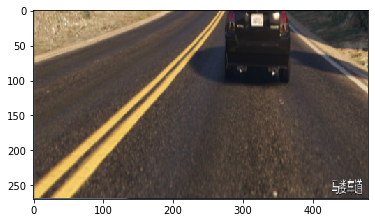

In [6]:
show_saved_data(390)

Object Tracking: Extract yellow line in the middle of the road from picture above

In [21]:
org_img=train_data[390][0]
#convert to hsv for better color separation (reference: Chapter 33)
hsv=cv2.cvtColor(org_img,cv2.COLOR_BGR2HSV)
lower_yellow=np.array([15,100,100])
upper_yellow=np.array([45,255,255])

#mask
yellow_mask=cv2.inRange(hsv,lower_yellow,upper_yellow)
res_yellow=cv2.bitwise_and(org_img,org_img,mask=yellow_mask)

#plot
cv2.imshow("",res_yellow)
cv2.waitKey(0)
cv2.destroyAllWindows()


Crop the image: only analyze the region of interests

In [13]:
def region_of_interest(img, vertices):
    """
    only keeps the region of img defined by polygon 多边形 formed from "vertices". 
    The rest of the img is set to black
    """
    #blank mask:
    mask=np.zeros_like(img) #black is 0
    
    #define 3 channel (e.g. rgb,hsv) or 1 channel (greyscale) color to fill mask, depending on input img's color channel
    if len(img.shape)>2: #3 channel
        channel_count=img.shape[2] #i.e. 3 or 4 depending on your image
        ignore_mask_color=(255,)*channel_count #white is 255
    else:
        ignore_mask_color=255
        
    #fill pixels inside the polygon defined by "vertices" with the fill color, this function directly modify the first input para "mask"
    cv2.fillPoly(mask,vertices,ignore_mask_color)
    
    #return image only where mask pixels are nonzero
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image
    
    

In [23]:
ROI_vertices=np.array([[(0,250),(100,100),(200,100),(100,250)]], dtype=np.int32)
ROI_image=region_of_interest(res_yellow,ROI_vertices)

In [24]:
cv2.imshow("",ROI_image)
cv2.waitKey(0)
cv2.destroyAllWindows()